In [181]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import plotly.graph_objects as go
import time

In [182]:
df = pd.read_csv('../RiverRoad_Quan_RF.csv')
df

,GRID_ID,qu_dem_MIN,qu_dem_MAX,qu_dem_RANGE,qu_dem_MEAN,qu_dem_STD,qu_dem_SUM,qu_dsm_MIN,qu_dsm_MAX,qu_dsm_RANGE,...,qu_curpl_SUM,qu_curpr_MIN,qu_curpr_MAX,qu_curpr_RANGE,qu_curpr_MEAN,qu_curpr_STD,qu_curpr_SUM,wetland_type,FID_RiverRd_AOI,wetland
0,AA-10,0.691847,1.731059,1.039212,1.117221,0.202755,313.939159,0.731374,6.256660,5.525286,...,1688.477507,-561.943237,585.859314,1147.802551,-6.984654,173.043352,-1941.733846,nonwetland,0,nonwetland
1,AA-11,0.641888,1.487661,0.845773,1.059745,0.147762,295.668776,0.661373,6.679267,6.017894,...,-1129.404510,-841.298767,679.957519,1521.256287,0.069758,168.483844,19.392675,nonwetland,0,nonwetland
2,AA-12,0.770032,1.507396,0.737363,1.176038,0.160304,329.290651,0.770032,5.681332,4.911300,...,-994.710507,-614.981445,614.381775,1229.363220,-9.649778,201.707961,-2692.288038,nonwetland,0,nonwetland
3,AA-13,0.761148,1.413489,0.652341,1.131694,0.115760,316.874198,0.761148,1.462370,0.701221,...,-2264.176594,-577.830017,633.895386,1211.725403,-1.244892,180.105412,-347.324849,nonwetland,0,nonwetland
4,AA-14,0.696000,1.392386,0.696386,1.160470,0.116413,322.610787,0.667013,1.392386,0.725372,...,-571.203099,-574.029480,501.253113,1075.282593,-1.556956,170.969213,-435.947672,nonwetland,0,nonwetland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8606,Z-95,0.851000,1.676798,0.825798,1.409729,0.230505,390.494948,0.851000,1.676798,0.825798,...,106.915450,-692.625366,738.732422,1431.357788,4.547107,170.083954,1268.642730,PEM1Rd,1,wetland
8607,Z-96,0.723952,1.662994,0.939042,1.425776,0.219366,396.365613,0.723952,1.662994,0.939042,...,-327.422941,-390.115845,542.452454,932.568298,10.324390,134.407219,2890.829178,PEM1Rd,1,wetland
8608,Z-97,0.836438,1.653542,0.817103,1.452142,0.180319,406.599629,0.836438,1.653542,0.817103,...,279.791020,-728.279236,753.877563,1482.156799,1.897032,165.294550,527.374799,PEM1Rd,1,wetland
8609,Z-98,0.997941,1.636024,0.638083,1.461971,0.166600,406.427984,0.997941,1.636024,0.638083,...,-313.958618,-622.526367,402.200531,1024.726898,4.975549,115.808141,1383.202760,PEM1Rd,1,wetland


In [183]:
X_df = df[['qu_dem_MEAN','qu_dem_RANGE']]
y_df = df['wetland']

X_train = df[:4305][['qu_dem_MEAN','qu_dem_RANGE']]
y_train = df[:4305]['wetland']

X_test = df[4306:][['qu_dem_MEAN','qu_dem_RANGE']]
y_test = df[4306:]['wetland']

In [184]:
r_non = []
r_wet = []
p_non = []
p_wet = []
f_non = []
f_wet = []
m_r_avg = []
m_p_avg = []
m_f_avg = []
start = time.time()
for k in range(1,50):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    model_knn = knn.fit(X_train, y_train)
    pred = model_knn.predict(X_test)
    #print(classification_report(y_test, pred, digits=3))
    precision,recall,fscore,support=score(y_test, pred)
    r_non.append(recall[0])
    r_wet.append(recall[1])
    p_non.append(precision[0])
    p_wet.append(precision[1])
    f_non.append(fscore[0])
    f_wet.append(fscore[1])
    precision,recall,fscore,support=score(y_test, pred, average="macro")
    m_r_avg.append(recall)
    m_p_avg.append(precision)
    m_f_avg.append(fscore)
print(time.time()-start)

20.907329082489014


(0.0, 1.0)

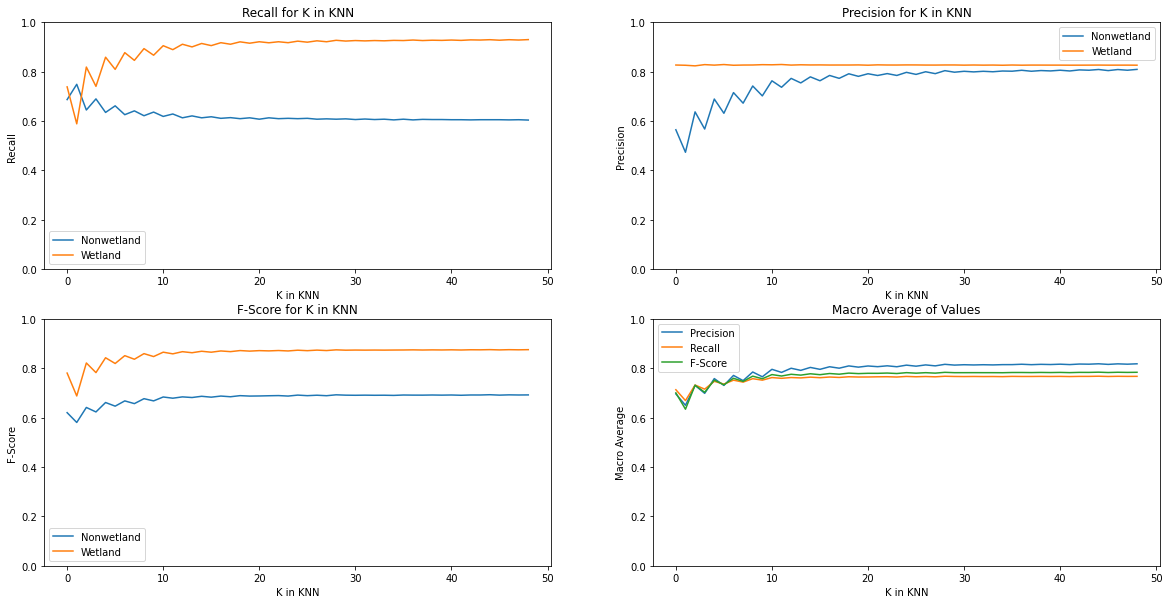

In [185]:
fig, ax = plt.subplots(2,2, figsize=(20,10))

# Recall for Nonwetland vs Wetland
ax[0, 0].set_title("Recall for K in KNN")
ax[0, 0].set_xlabel("K in KNN")
ax[0, 0].set_ylabel("Recall")
ax[0, 0].plot(range(len(r_non)), r_non, label="Nonwetland")
ax[0, 0].plot(range(len(r_wet)), r_wet, label="Wetland")
ax[0, 0].legend()
ax[0, 0].set_ylim([0,1])

# Precision for Nonwetland vs Wetland
ax[0, 1].set_title("Precision for K in KNN")
ax[0, 1].set_xlabel("K in KNN")
ax[0, 1].set_ylabel("Precision")
ax[0, 1].plot(range(len(p_non)), p_non, label="Nonwetland")
ax[0, 1].plot(range(len(p_wet)), p_wet, label="Wetland")
ax[0, 1].legend()
ax[0, 1].set_ylim([0,1])

# F-Score for Nonwetland vs Wetland
ax[1, 0].set_title("F-Score for K in KNN")
ax[1, 0].set_xlabel("K in KNN")
ax[1, 0].set_ylabel("F-Score")
ax[1, 0].plot(range(len(f_non)), f_non, label="Nonwetland")
ax[1, 0].plot(range(len(f_wet)), f_wet, label="Wetland")
ax[1, 0].legend()
ax[1, 0].set_ylim([0,1])

# F-Score for Nonwetland vs Wetland
ax[1, 1].set_title("Macro Average of Values")
ax[1, 1].set_xlabel("K in KNN")
ax[1, 1].set_ylabel("Macro Average")
ax[1, 1].plot(range(len(m_p_avg)), m_p_avg, label="Precision")
ax[1, 1].plot(range(len(m_r_avg)), m_r_avg, label="Recall")
ax[1, 1].plot(range(len(m_f_avg)), m_f_avg, label="F-Score")
ax[1, 1].legend()
ax[1, 1].set_ylim([0,1])

In [186]:
mesh_size = .02
margin = 0.25

# Load and split data
X, y = make_moons(noise=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y.astype(str), test_size=0.25, random_state=0)

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

# Create classifier, run predictions on grid
clf = KNeighborsClassifier(15, weights='uniform')
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [X_train, y_train, '0', 'Train', 'square'],
    [X_train, y_train, '1', 'Train', 'circle'],
    [X_test, y_test, '0', 'Test', 'square-dot'],
    [X_test, y_test, '1', 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)
fig.show()


In [187]:
X = X_df.to_numpy()
y = y_df.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)
for k in range(14, 15):
    clf = KNeighborsClassifier(k, weights='uniform')
    clf.fit(X, y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig = go.Figure(data=[
        go.Contour(
            x=xrange,
            y=yrange,
            z=Z,
            colorscale='RdBu',
        )
    ])

    fig.update_layout(
        title=f"KNN with {k} Neighbors",
        xaxis_title="DEM Mean",
        yaxis_title="Flow Accumulation Mean",
    )
    fig.show()